In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the data
data  = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check for missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Drop the Cabin, Ticket,Name and PassengerId columns
data.drop(['Cabin','Ticket','Name','PassengerId'],axis=1,inplace=True)

In [6]:
cols=['SibSp','Parch','Fare','Age']
for col in cols:
    data[col].fillna(data[col].mean(),inplace=True)
    data.Embarked.fillna('S',inplace=True)

In [7]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [8]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
# Convert categorical variables into dummy/indicator variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['Sex','Embarked']
for col in cols:
    data[col]=le.fit_transform(data[col])
    test[col]=le.fit_transform(test[col])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [10]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

In [11]:
# model building
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
# Split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(data.drop('Survived',axis=1),data['Survived'],test_size=0.3,random_state=0)

In [13]:
# Build the model
logreg=LogisticRegression()

In [14]:
# Fit the model
logreg.fit(X_train,y_train)

c:\Users\syeda\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
# Predict the model
y_pred=logreg.predict(X_test)

In [16]:
# Check the accuracy
accuracy_score(y_test,y_pred)

0.7910447761194029

In [17]:
# Predict the test data
test.drop(['Cabin','Ticket','Name','PassengerId'],axis=1,inplace=True)

In [18]:
cols=['SibSp','Parch','Fare','Age']
for col in cols:
    test[col].fillna(test[col].mean(),inplace=True)
    test.Embarked.fillna('S',inplace=True)

In [19]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [20]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [21]:
# accuacy
y_pred=logreg.predict(test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

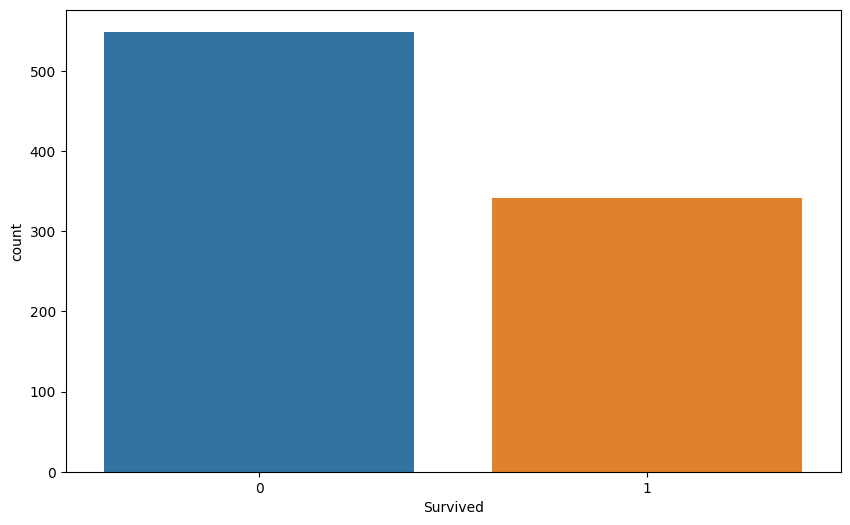

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived',data=data)
plt.show()

In [23]:
# test data
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [25]:
cols=['SibSp','Parch','Fare','Age']
for col in cols:
    test[col].fillna(test[col].mean(),inplace=True)
    test.Embarked.fillna('S',inplace=True)

In [26]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
# submission
submission=pd.DataFrame({'Sex':test['Sex'],'Survived':y_pred})

In [30]:
submission.to_csv('submission.csv',index=False)

In [31]:
# shapiro test
from scipy.stats import shapiro
data=[1,2,3,4,5,6,7,8,9,10]
stat,p=shapiro(data)
print('stat=%.3f,p=%.3f'%(stat,p))
if p>0.05:
    print('sample looks gaussian')
else:
    print('sample does not look gaussian')

stat=0.970,p=0.892
sample looks gaussian


In [32]:
# normality test
from scipy.stats import normaltest
data=[1,2,3,4,5,6,7,8,9,10]
stat,p=normaltest(data)
print('stat=%.3f,p=%.3f'%(stat,p))
if p>0.05:
    print('sample looks gaussian')
else:
    print('sample does not look gaussian')

stat=2.027,p=0.363
sample looks gaussian


c:\Users\syeda\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

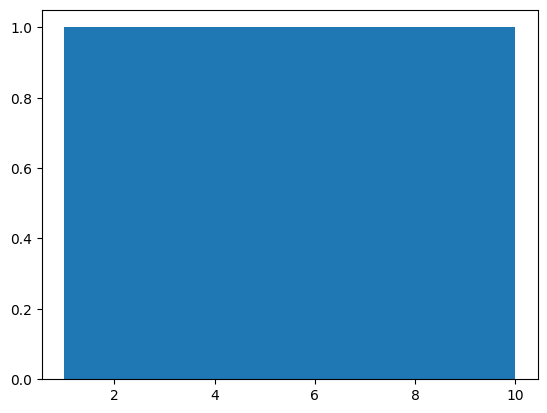

In [33]:
# histogram
plt.hist(data)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fa5332e2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fa5332e820>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fa5332e040>],
 'medians': [<matplotlib.lines.Line2D at 0x1fa5332ed60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fa531bc040>],
 'means': []}

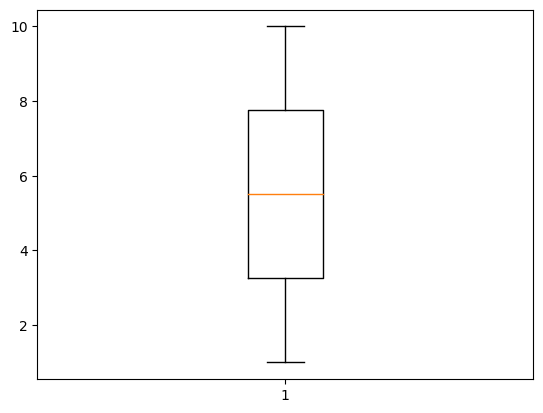

In [34]:
#  boxplot
plt.boxplot(data)

C:\Users\syeda\AppData\Local\Temp\ipykernel_16328\1851847670.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


<AxesSubplot: ylabel='Density'>

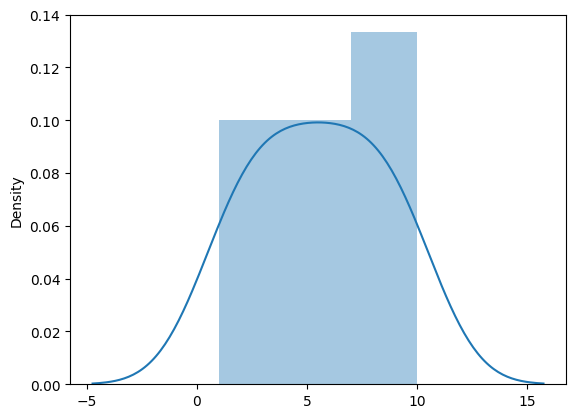

In [35]:
sns.distplot(data)

In [36]:
# pearson correlation
from scipy.stats import pearsonr
data1=[1,2,3,4,5,6,7,8,9,10]
data2=[1,2,3,4,5,6,7,8,9,10]
stat,p=pearsonr(data1,data2)
print('stat=%.3f,p=%.3f'%(stat,p))
if p>0.05:
    print('sample looks gaussian')
else:
    print('sample does not look gaussian')

stat=1.000,p=0.000
sample does not look gaussian


In [39]:
# sparman correlation
from scipy.stats import spearmanr
data1=[1,2,3,4,5,6,7,8,9,10]
data2=[-22,-11,0,11,22,33,44,55,66,77]
stat,p=spearmanr(data1,data2)
print('stat=%.3f,p=%.3f'%(stat,p))
if p>0.05:
    print('sample looks gaussian')
else:
    print('sample does not look gaussian')

stat=1.000,p=0.000
sample does not look gaussian


In [40]:
# chi square test
from scipy.stats import chi2_contingency
table=[[10,20,30],[6,9,17]]
stat,p,dof,expected=chi2_contingency(table)
print('stat=%.3f,p=%.3f'%(stat,p))
if p>0.05:
    print('sample looks gaussian')
else:
    print('sample does not look gaussian')

stat=0.272,p=0.873
sample looks gaussian


In [41]:
# student t test
from scipy.stats import ttest_ind
data1=[1,2,3,4,5,6,7,8,9,10]
data2=[100,200,300,400,500,600,-700,800,900,1000]
stat,p=ttest_ind(data1,data2)
print('stat=%.3f,p=%.3f'%(stat,p))
if p>0.05:
    print(f'same distribution (fail to reject H0)')
else:
    print(f'different distribution (reject H0)')

stat=-2.606,p=0.018
different distribution (reject H0)


In [42]:
# paired t test
from scipy.stats import ttest_rel
data1=[1,2,3,4,5,6,7,8,9,10]
data2=[100,200,300,400,500,600,-700,800,900,1000]
stat,p=ttest_rel(data1,data2)
print('stat=%.3f,p=%.3f'%(stat,p))
if p>0.05:
    print(f'same distribution (fail to reject H0)')
else:
    print(f'different distribution (reject H0)')

stat=-2.613,p=0.028
different distribution (reject H0)


In [43]:
# annova
from scipy.stats import f_oneway
data1=[1,2,3,4,5,6,7,8,9,10]
data2=[100,-333,300,400,500,600,-700,800,900,1000]
data3=[100,200,300,400,500,600,-700,800,900,1000]
stat,p=f_oneway(data1,data2,data3)
print('stat=%.3f,p=%.3f'%(stat,p))
if p>0.05:
    print(f'same distribution (fail to reject H0)')
else:
    print(f'different distribution (reject H0)')

stat=2.707,p=0.085
same distribution (fail to reject H0)


In [44]:
# post hoc test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
data1=[1,2,3,4,5,6,7,8,9,10]
data2=[100,-333,300,400,500,600,-700,800,-900,1000]
data3=[100,200,300,400,500,600,-700,800,900,1000]
data=data1+data2+data3
groups=['data1']*len(data1)+['data2']*len(data2)+['data3']*len(data3)
result=pairwise_tukeyhsd(data,groups,0.05)
print(result)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
 data1  data2    171.2 0.6895 -341.7345 684.1345  False
 data1  data3    404.5 0.1429 -108.4345 917.4345  False
 data2  data3    233.3 0.5057 -279.6345 746.2345  False
-------------------------------------------------------


In [45]:
# bonferroni correction
from statsmodels.stats.multitest import multipletests
p_values=[0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.010]
result=multipletests(p_values,method='bonferroni')
print(result)

(array([ True,  True,  True,  True,  True, False, False, False, False,
       False]), array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ]), 0.005116196891823743, 0.005)


In [46]:
import pandas as pd
import numpy as np

In [49]:
# salary yearsexperience
data=pd.read_csv('./Linear Regression - Sheet1.csv')
data.head()

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556


In [50]:
# split data
from sklearn.model_selection import train_test_split

In [52]:
X=data[['X']]
y=data['Y']

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [54]:
# fit model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [55]:
regressor.fit(X_train,y_train)

LinearRegression()

In [56]:
# predict
y_pred=regressor.predict(X_test)

In [57]:
# evaluate
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7985647513515579

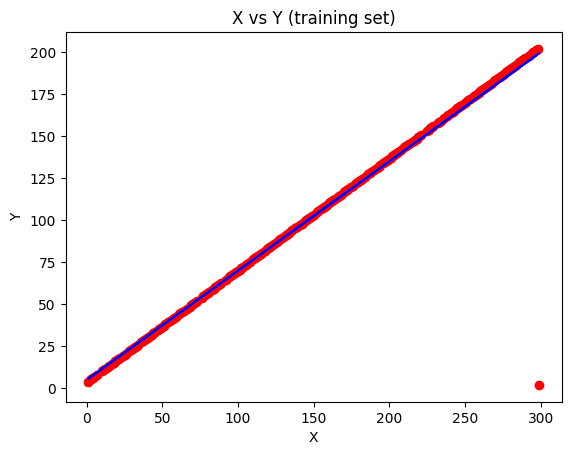

In [58]:
# visualize
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('X vs Y (training set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [59]:
# predict
y_pred=regressor.predict(X_test)

In [60]:
# predict
regressor.predict([[5]])

c:\Users\syeda\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.11696016])

In [61]:
regressor.predict([[5],[6],[7]])

c:\Users\syeda\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.11696016, 8.76719188, 9.41742361])

In [64]:
# age column
data['age']=np.random.randint(20,50,len(data))

In [65]:
data['distance']=np.random.randint(1,100,len(data))

In [66]:
data.head()

,X,Y,age,distance
0,1,3.888889,49,41
1,2,4.555556,23,79
2,3,5.222222,24,18
3,4,5.888889,35,13
4,5,6.555556,25,33


In [67]:
# age, distance astype float
data['age']=data['age'].astype(float)
data['distance']=data['distance'].astype(float)

In [68]:
data.head()

,X,Y,age,distance
0,1,3.888889,49.0,41.0
1,2,4.555556,23.0,79.0
2,3,5.222222,24.0,18.0
3,4,5.888889,35.0,13.0
4,5,6.555556,25.0,33.0


In [69]:
X=data[['age','distance','X']]
y=data['Y']

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [71]:
regressor=LinearRegression()

In [72]:
regressor.fit(X_train,y_train)

LinearRegression()

In [73]:
y_pred=regressor.predict(X_test)

In [74]:
r2_score(y_test,y_pred)

0.7980780781314954

In [75]:
# test efficiency
import time
start=time.time()
regressor.fit(X_train,y_train)


LinearRegression()

In [76]:
end=time.time()
print(end-start)

3.0911624431610107


In [77]:
# multiple linear regression plot
import statsmodels.api as sm
X=np.append(arr=np.ones((len(X),1)).astype(int),values=X,axis=1)
X_opt=X[:,[0,1,2,3]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     1159.
Date:                Thu, 02 Feb 2023   Prob (F-statistic):          3.17e-163
Time:                        08:22:47   Log-Likelihood:                -1260.7
No. Observations:                 300   AIC:                             2529.
Df Residuals:                     296   BIC:                             2544.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9612      4.140      2.164      0.031       0.813      17.109
x1            -0.0913      0.102     -0.894      0.372      -0.292       0.110
x2            -0.0015      0.033     -0.045      0.964      -0.067       0.064
x3             0.6405      0.011     58.916      0.000       0.619       0.662
==============================================================================
Omnibus:                      570.957   Durbin-Watson:                   0.522
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           246355.194
Skew:                         -11.712   Prob(JB):                         0.00
Kurtosis:                     141.419   Cond. No.                         802.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
data.head()

,X,Y,age,distance
0,1,3.888889,49.0,41.0
1,2,4.555556,23.0,79.0
2,3,5.222222,24.0,18.0
3,4,5.888889,35.0,13.0
4,5,6.555556,25.0,33.0


In [79]:
data['height']=np.random.randint(150,200,len(data))

In [80]:
data['weight']=np.random.randint(50,100,len(data))

In [81]:
data.head()

,X,Y,age,distance,height,weight
0,1,3.888889,49.0,41.0,152,52
1,2,4.555556,23.0,79.0,195,78
2,3,5.222222,24.0,18.0,167,66
3,4,5.888889,35.0,13.0,185,68
4,5,6.555556,25.0,33.0,191,82


In [82]:
data['gender']=np.random.randint(0,2,len(data))

In [83]:
data['likeness']=np.random.randint(0,2,len(data))

In [84]:
data.head()

,X,Y,age,distance,height,weight,gender,likeness
0,1,3.888889,49.0,41.0,152,52,1,0
1,2,4.555556,23.0,79.0,195,78,1,0
2,3,5.222222,24.0,18.0,167,66,0,1
3,4,5.888889,35.0,13.0,185,68,0,1
4,5,6.555556,25.0,33.0,191,82,0,0


In [85]:
# replace
data['gender']=data['gender'].replace(0,'male')

In [86]:
data['gender']=data['gender'].replace(1,'female')

In [87]:
data['likeness']=data['likeness'].replace(0,'dislike')

In [88]:
data['likeness']=data['likeness'].replace(1,'like')

In [89]:
data.head()

,X,Y,age,distance,height,weight,gender,likeness
0,1,3.888889,49.0,41.0,152,52,female,dislike
1,2,4.555556,23.0,79.0,195,78,female,dislike
2,3,5.222222,24.0,18.0,167,66,male,like
3,4,5.888889,35.0,13.0,185,68,male,like
4,5,6.555556,25.0,33.0,191,82,male,dislike


In [90]:
X=data[['weight','gender']]
y=data['likeness']

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [92]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
X_train['gender']=labelencoder.fit_transform(X_train['gender'])
X_test['gender']=labelencoder.transform(X_test['gender'])

In [93]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('one_hot_encoder',OneHotEncoder(categories='auto'),[1])],remainder='passthrough')
X_train=np.array(ct.fit_transform(X_train),dtype=np.float)
X_test=np.array(ct.transform(X_test),dtype=np.float)

C:\Users\syeda\AppData\Local\Temp\ipykernel_16328\1404025144.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train=np.array(ct.fit_transform(X_train),dtype=np.float)
C:\Users\syeda\AppData\Local\Temp\ipykernel_16328\1404025144.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test=np.array(ct.transform(X_test),dtype=np.float)


In [94]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [95]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [96]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [97]:
# fit model
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [98]:
# predict
y_pred=classifier.predict(X_test)

In [100]:
# predict
classifier.predict([[50,1,0]])

array(['dislike'], dtype=object)

In [101]:
# accuracy of model
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)

In [102]:
accuracy_score(y_test,y_pred)

0.5833333333333334

In [103]:
print(f'Confusion Matrix: {cm}')

Confusion Matrix: [[19 14]
 [11 16]]


In [104]:
# predicted values and actual values
print(f'Predicted Values: {y_pred}')

Predicted Values: ['dislike' 'like' 'dislike' 'dislike' 'dislike' 'like' 'dislike' 'like'
 'dislike' 'like' 'dislike' 'like' 'dislike' 'like' 'dislike' 'dislike'
 'like' 'like' 'like' 'like' 'dislike' 'like' 'like' 'like' 'like' 'like'
 'like' 'like' 'like' 'dislike' 'dislike' 'like' 'dislike' 'dislike'
 'dislike' 'like' 'like' 'dislike' 'dislike' 'dislike' 'dislike' 'dislike'
 'like' 'dislike' 'dislike' 'like' 'dislike' 'like' 'dislike' 'like'
 'dislike' 'like' 'like' 'dislike' 'like' 'dislike' 'like' 'dislike'
 'like' 'dislike']


In [105]:
print(f'Actual Values: {y_test}')

Actual Values: 208    dislike
188       like
12     dislike
221    dislike
239    dislike
136    dislike
230       like
206       like
52        like
108    dislike
290       like
15        like
184       like
248       like
22     dislike
74        like
270    dislike
90        like
229       like
164       like
190    dislike
103    dislike
124       like
129    dislike
222    dislike
116       like
194    dislike
286       like
234    dislike
295       like
92     dislike
66     dislike
8      dislike
122    dislike
219    dislike
150       like
176    dislike
182    dislike
299    dislike
5         like
223    dislike
89     dislike
81        like
34        like
55        like
139    dislike
236    dislike
64        like
7         like
45        like
73     dislike
213    dislike
173    dislike
106    dislike
59        like
253    dislike
168    dislike
26        like
284       like
153    dislike
Name: likeness, dtype: object


In [106]:
score=classifier.score(X_test,y_test)
print(f'Accuracy: {score}')

Accuracy: 0.5833333333333334


In [107]:
# saving a trained model
import joblib
joblib.dump(classifier,'classifier.joblib')

['classifier.joblib']

In [108]:
#  how to run a stored model 
import joblib
classifier=joblib.load('classifier.joblib')

In [110]:
# graphical representation of decision tree
from sklearn import tree
tree.export_graphviz(classifier,out_file='tree.dot',
feature_names=['age','gender','height'],
class_names=sorted(y.unique()),
label='all',
rounded=True,
filled=True)

In [111]:
# minkowski distance
import math
math.sqrt((5-3)**2+(3-1)**2)

2.8284271247461903

In [112]:
print(f'Minkowski Distance: {math.sqrt((5-3)**2+(3-1)**2)}')

Minkowski Distance: 2.8284271247461903


In [113]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [114]:
from sklearn.tree import DecisionTreeClassifier
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [115]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

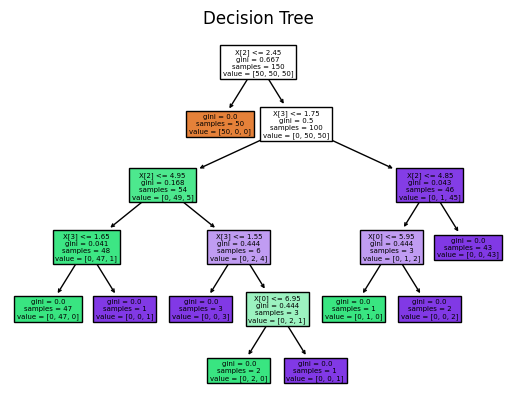

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
classifier=DecisionTreeClassifier().fit(X,y)
plot_tree(classifier,filled=True)
plt.title('Decision Tree')
plt.show()

In [117]:
# save plot in tiff format in HD
plt.savefig('decision_tree.tiff',dpi=500)

<Figure size 640x480 with 0 Axes>

In [118]:
# save plot in png format in HD
plt.savefig('decision_tree.png',dpi=500)

<Figure size 640x480 with 0 Axes>

In [119]:
# save plot in pdf format in HD
plt.savefig('decision_tree.pdf',dpi=500)

<Figure size 640x480 with 0 Axes>

In [ ]:
# save plot in svg format in HD


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
digits=load_digits()
print(digits.data.shape)

(1797, 64)


In [3]:
# shape of data
print(digits.data.shape)

(1797, 64)


In [4]:
# shape of target
print(digits.target.shape)

(1797,)


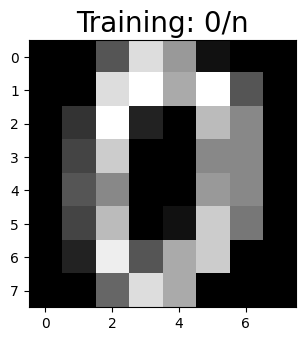

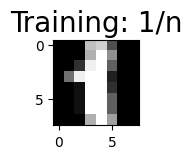

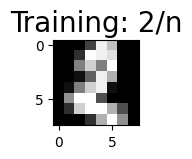

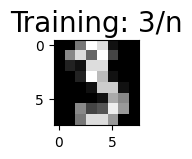

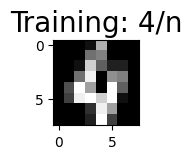

In [5]:
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training: %i/n' % label,fontsize=20)
    plt.show()